# Experimental hydrograpghs using siphons

#### Based off my experiment design, I need to simulate a hydrograph assuming that the suction head of my siphons is decreasing in time. First we will import the libraries necessary for the calculations:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time 
import pandas as pd

#### Now we will enter our input parameters:

In [30]:
# if the pool is round: 
pool_diameter = 3.048 #(m)
H = 0.762 #(m)

#Number of pools:
pools = 2

# Syphon
siphons_per_pool = 2 # number of syphons per pool
siphon_diameter = 0.0508 #(m)
initial_head = 0.9  # Initial head of the reservoirs (m)


#### Definition of function that calculates the flow rate for different suction heads

In [31]:
# Some geometric calculations prior: 
siphon_area = np.pi * (siphon_diameter/2)**2 # (m2)
pool_area = np.pi * (pool_diameter/2)**2 # (m2)

def calculate_flow_rate(head, siphon_area, discharge_coefficient):
    discharge_coefficient=0.5
    g = 9.81  # Acceleration due to gravity (m/s^2)
    flow_rate = np.sqrt(2 * g * head) * siphon_area * discharge_coefficient
    return flow_rate

#### Flow rate calculation every 10 seconds where the two syphons can start at different times (for one pool)

In [32]:
start_time_siphon1 = 0  # Start time for the first siphon (in iterations)
start_time_siphon2 = 10  # Start time for the second siphon (2 iterations later (60 seconds later))

data = {'Iteration': [], 'Time (s)': [], 'Head (m)': [], 'Flow Rate Siphon 1 (m^3/s)': [], 'Flow Rate Siphon 2 (m^3/s)': [], 'Total Flow Rate (m^3/s)': []}

time_interval = 10  # 10 seconds interval
elapsed_time_siphon1 = 0
elapsed_time_siphon2 = 0

for iteration in range(60):  # Adjust the number of iterations as needed
    if initial_head >= 0.4:
        current_time = iteration * time_interval  # 10 seconds per iteration

        # Calculate flow rates for both siphons
        flow_rate_siphon1 = calculate_flow_rate(initial_head, siphon_area, discharge_coefficient)
        elapsed_time_siphon1 = current_time
        
        # Adjust flow rate for siphon 2 based on time difference
        if elapsed_time_siphon1 >= start_time_siphon2 * time_interval:  # Convert start time to seconds
            elapsed_time_siphon2 = elapsed_time_siphon1 - start_time_siphon2 * 10
            flow_rate_siphon2 = calculate_flow_rate(initial_head, siphon_area, discharge_coefficient)
        else:
            flow_rate_siphon2 = 0.0

        # Calculate total flow rate
        flow_rate_total = flow_rate_siphon1+flow_rate_siphon2

        data['Iteration'].append(iteration)
        data['Time (s)'].append(current_time)
        data['Flow Rate Siphon 1 (m^3/s)'].append(flow_rate_siphon1)
        data['Flow Rate Siphon 2 (m^3/s)'].append(flow_rate_siphon2)
        data['Total Flow Rate (m^3/s)'].append(flow_rate_total)
        data['Head (m)'].append(initial_head)  # Append the current head value

        # Calculate the change in water depth based on the flow rate and time interval (10 seconds)
        change_in_head = -(flow_rate_total) * time_interval / pool_area  # Adjust for pool dimensions
        initial_head += change_in_head

#### Now we can plot the resulting hydrograph!

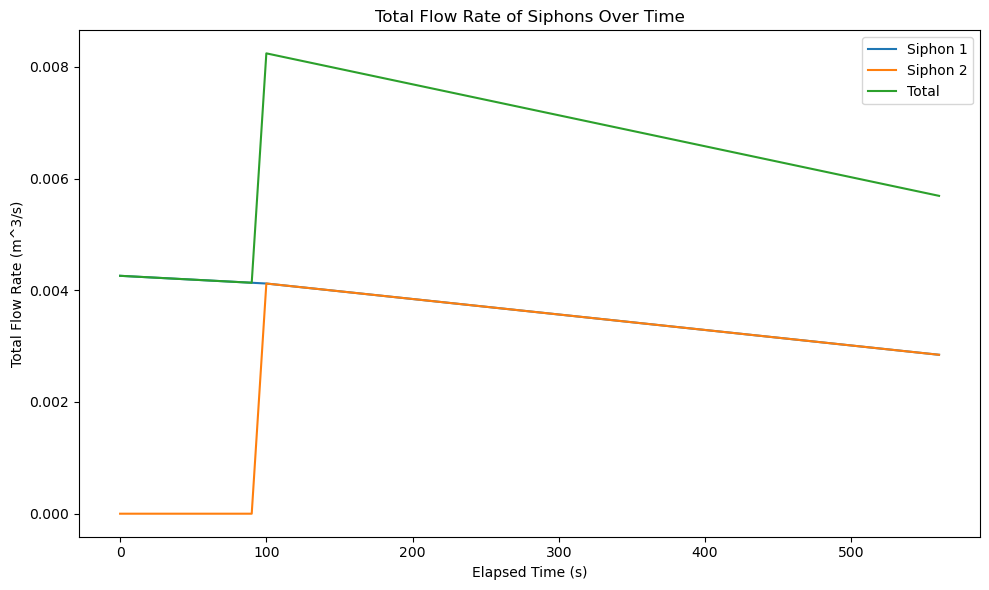

In [33]:
# Convert list to a data frame
df = pd.DataFrame(data)
# Save to a csv file
df.to_csv('siphon_data.csv', index=False)

# Plotting the total flow rate over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Time (s)'], df['Flow Rate Siphon 1 (m^3/s)'], label='Siphon 1')
ax.plot(df['Time (s)'], df['Flow Rate Siphon 2 (m^3/s)'], label='Siphon 2')
ax.plot(df['Time (s)'], df['Total Flow Rate (m^3/s)'], label='Total')
ax.set_xlabel('Elapsed Time (s)')
ax.set_ylabel('Total Flow Rate (m^3/s)')
ax.set_title('Total Flow Rate of Siphons Over Time')
ax.legend()
plt.tight_layout()
plt.show()

#### The rising limb is too steep compared to the falling limb. We can try to play around with the head and timing of different siphons

In [55]:
# Round pool:
pool_diameter = 3.048 #(m)
H = 0.762 #(m)

# Syphons
siphons_per_pool = 2 # number of syphons per pool
siphon_diameter = 0.0508 #(m)
initial_head_A = 0.9  # Initial head of pool A (m)
initial_head_B = 0.9 # Initial head of pool B (m)

# Additional constants
g=9.81 # (m/s2) acceleration of gravity
rho=1000 # (kg/m3) water density
discharge_coefficient=0.5

#######################################################################################

start_time_siphon1 = 0  # Start time for the first siphon (in iterations)
start_time_siphon2 = 12  # Start time for the second siphon (in 10 iterations, ie 100 seconds)
start_time_siphon3 = 24
start_time_siphon4 = 36

data = {
    'Iteration': [], 'Time (s)': [], 'Head A (m)': [], 'Head B (m)': [], 
    'Flow Rate Siphon 1 (m^3/s)': [], 'Flow Rate Siphon 2 (m^3/s)': [],
    'Flow Rate Siphon 3 (m^3/s)': [], 'Flow Rate Siphon 4 (m^3/s)': [], 'Total Flow Rate (m^3/s)': []
    }

time_interval = 10  # 10 seconds interval
elapsed_time_siphon1 = 0
elapsed_time_siphon2 = 0
elapsed_time_siphon3 = 0
elapsed_time_siphon4 = 0

for iteration in range(100):  # Adjust the number of iterations as needed
    if initial_head_A > 0 and initial_head_B >  0:
        current_time = iteration * time_interval  # 10 seconds per iteration

        # For Pool A: 
        # Calculate flow rates for both siphons
        flow_rate_siphon1 = calculate_flow_rate(initial_head_A, siphon_area, discharge_coefficient)
        elapsed_time_siphon1 = current_time
        # Adjust flow rate for siphon 2 based on time difference
        if current_time >= start_time_siphon2 * time_interval:  # Convert start time to seconds
            elapsed_time_siphon2 = current_time - start_time_siphon2 * 10
            flow_rate_siphon2 = calculate_flow_rate(initial_head_A, siphon_area, discharge_coefficient)
        else:
            flow_rate_siphon2 = 0.0

        # For Pool B: 
        # For Syphon 3
        if current_time >= start_time_siphon3 * time_interval:  # Convert start time to seconds
            elapsed_time_siphon3 = current_time - start_time_siphon3 * 10
            flow_rate_siphon3 = calculate_flow_rate(initial_head_B, siphon_area, discharge_coefficient)
        else:
            flow_rate_siphon3 = 0.0
        # For Syphon 4
        if current_time >= start_time_siphon4 * time_interval:  # Convert start time to seconds
            elapsed_time_siphon4 = current_time - start_time_siphon4 * 10
            flow_rate_siphon4 = calculate_flow_rate(initial_head_B, siphon_area, discharge_coefficient)
        else:
            flow_rate_siphon4 = 0.0

        # Calculate total flow rate
        flow_rate_total = flow_rate_siphon1 + flow_rate_siphon2 + flow_rate_siphon3 + flow_rate_siphon4

        data['Iteration'].append(iteration)
        data['Time (s)'].append(current_time)
        data['Head A (m)'].append(initial_head_A)
        data['Flow Rate Siphon 1 (m^3/s)'].append(flow_rate_siphon1)
        data['Flow Rate Siphon 2 (m^3/s)'].append(flow_rate_siphon2)
        data['Head B (m)'].append(initial_head_B)
        data['Flow Rate Siphon 3 (m^3/s)'].append(flow_rate_siphon3)
        data['Flow Rate Siphon 4 (m^3/s)'].append(flow_rate_siphon4)
        data['Total Flow Rate (m^3/s)'].append(flow_rate_total)


        # Calculate the change in water depth based on the flow rate and time interval (10 seconds)
        # For pool A: 
        change_in_head_A = -(flow_rate_siphon1+flow_rate_siphon2) * time_interval / pool_area  # Adjust for pool dimensions
        initial_head_A += change_in_head_A
        # For pool B:
        change_in_head_B = -(flow_rate_siphon3+flow_rate_siphon4) * time_interval / pool_area  # Adjust for pool dimensions
        initial_head_B += change_in_head_B

#### Plotting our data again

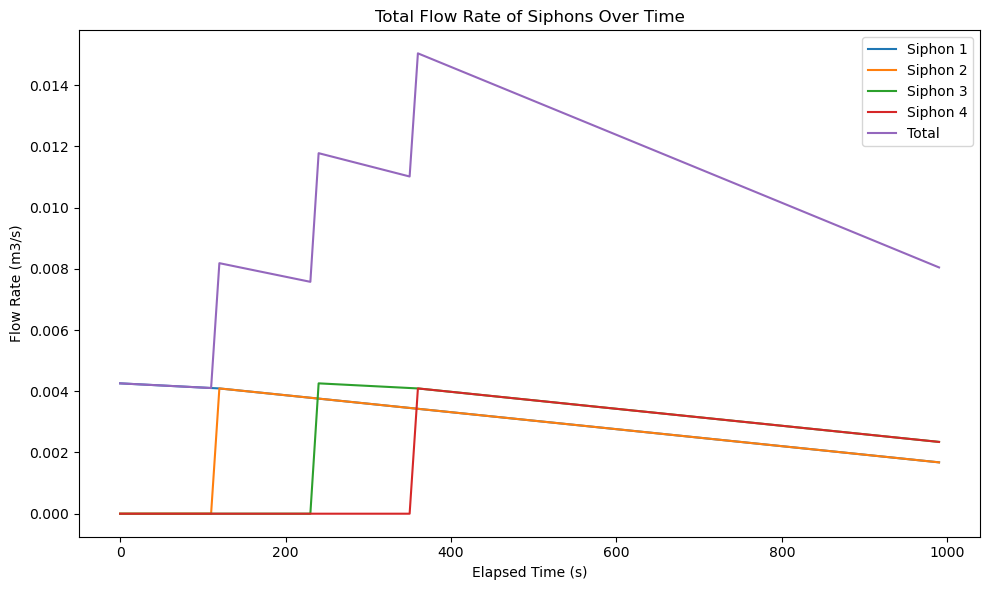

In [59]:
# Convert list to a data frame
df = pd.DataFrame(data)
# Save to a csv file
df.to_csv('siphon_data.csv', index=False)

# Plotting the total flow rate over time
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Time (s)'], df['Flow Rate Siphon 1 (m^3/s)'], label='Siphon 1')
ax.plot(df['Time (s)'], df['Flow Rate Siphon 2 (m^3/s)'], label='Siphon 2')
ax.plot(df['Time (s)'], df['Flow Rate Siphon 3 (m^3/s)'], label='Siphon 3')
ax.plot(df['Time (s)'], df['Flow Rate Siphon 4 (m^3/s)'], label='Siphon 4')
ax.plot(df['Time (s)'], df['Total Flow Rate (m^3/s)'], label='Total')
ax.set_xlabel('Elapsed Time (s)')
ax.set_ylabel('Flow Rate (m3/s)')
ax.set_title('Total Flow Rate of Siphons Over Time')
ax.legend()
plt.tight_layout()
# Save the plot as an image file 
plt.savefig('flow_rates_plot.png')
plt.show()

In [58]:
max_total_flow_rate = df['Total Flow Rate (m^3/s)'].max()
max_total_flow_rate

0.015039738912364445

In [52]:
df

,Iteration,Time (s),Head A (m),Head B (m),Flow Rate Siphon 1 (m^3/s),Flow Rate Siphon 2 (m^3/s),Flow Rate Siphon 3 (m^3/s),Flow Rate Siphon 4 (m^3/s),Total Flow Rate (m^3/s)
0,0,0,0.900000,0.9,0.004259,0.000000,0.000000,0.000000,0.004259
1,1,10,0.888327,0.9,0.004231,0.000000,0.000000,0.000000,0.004231
2,2,20,0.876731,0.9,0.004203,0.000000,0.000000,0.000000,0.004203
3,3,30,0.865210,0.9,0.004175,0.000000,0.000000,0.000000,0.004175
4,4,40,0.853765,0.9,0.004148,0.000000,0.000000,0.000000,0.004148
...,...,...,...,...,...,...,...,...,...
76,76,760,0.005152,0.9,0.000322,0.000322,0.004259,0.004259,0.009161
77,77,770,0.003386,0.9,0.000261,0.000261,0.004259,0.004259,0.009039
78,78,780,0.001954,0.9,0.000198,0.000198,0.004259,0.004259,0.008914
79,79,790,0.000866,0.9,0.000132,0.000132,0.004259,0.004259,0.008781
